In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("FB.csv", index_col="Date", parse_dates=True)

In [3]:
print(f"Data shape: {data.shape}")
print(data.head(20))

Data shape: (1608, 43)
               ID      Close        Low       High     Volume  C(t-5)  C(t-4)  \
Date                                                                            
2012-07-09  41099  31.730000  31.260000  31.900000   10945600   31.10   30.77   
2012-07-10  41100  32.169998  31.990000  32.880001   17785200   30.77   31.20   
2012-07-11  41101  31.469999  31.160000  32.480000   14269500   31.20   31.47   
2012-07-12  41102  30.969999  30.549999  31.559999   13030300   31.47   31.73   
2012-07-13  41103  30.809999  30.600000  31.400000   11300700   31.73   32.17   
2012-07-16  41106  30.719999  30.559999  31.070000    8108300   32.17   31.47   
2012-07-17  41107  28.250000  28.209999  30.500000   24672100   31.47   30.97   
2012-07-18  41108  28.090000  27.150000  28.590000   30438600   30.97   30.81   
2012-07-19  41109  29.110001  28.150000  29.290001   16841800   30.81   30.72   
2012-07-20  41110  29.000000  28.629999  29.500000   13685100   30.72   28.25   
2012-

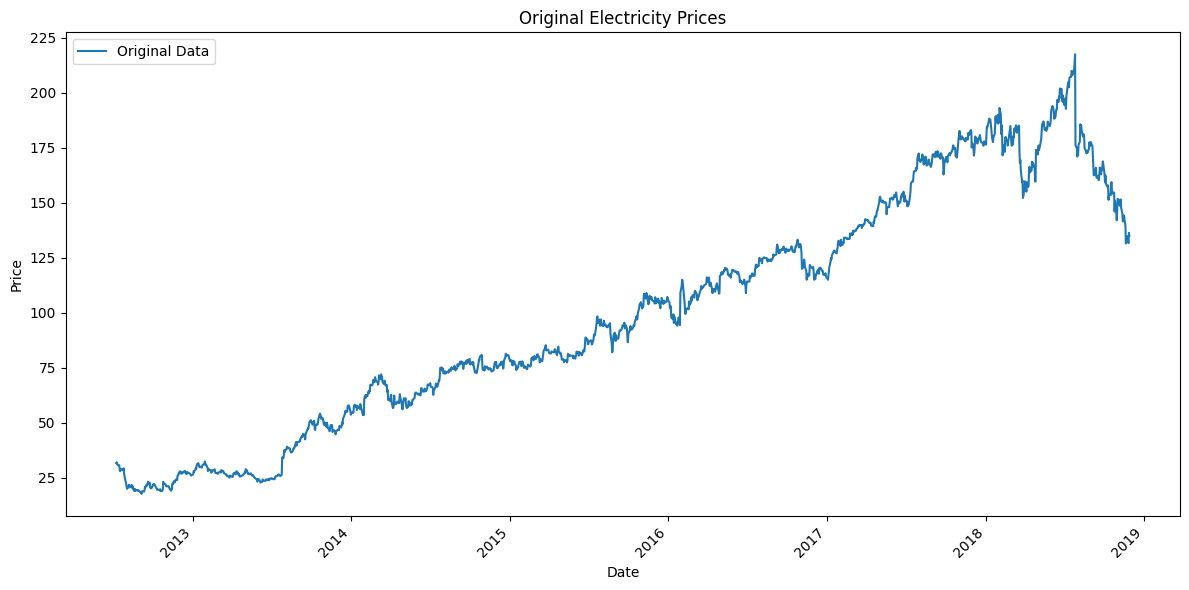

In [4]:


plt.figure(figsize=(12, 6))
data["Close"].plot(label="Original Data")
plt.title("Original Electricity Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [25]:
rolling_mean_5 = data['Close'].rolling(window=5).mean()
print("First 10 values of the rolling mean with window size 5:")
print(rolling_mean_5.head(10))

First 10 values of the rolling mean with window size 5:
Date
2012-07-09          NaN
2012-07-10          NaN
2012-07-11          NaN
2012-07-12          NaN
2012-07-13    31.429999
2012-07-16    31.227999
2012-07-17    30.443999
2012-07-18    29.767999
2012-07-19    29.396000
2012-07-20    29.034000
Name: Close, dtype: float64


In [27]:
rolling_mean_10 = data['Close'].rolling(window=10).mean()
print("First 10 values of the rolling mean with window size 10:")
print(rolling_mean_10.head(10))

First 10 values of the rolling mean with window size 10:
Date
2012-07-09       NaN
2012-07-10       NaN
2012-07-11       NaN
2012-07-12       NaN
2012-07-13       NaN
2012-07-16       NaN
2012-07-17       NaN
2012-07-18       NaN
2012-07-19       NaN
2012-07-20    30.232
Name: Close, dtype: float64


In [6]:
# Define window sizes for moving average
window_sizes = [5, 10]

# Calculate moving averages
for window in window_sizes:
  data["MA_" + str(window)] = data["Close"].rolling(window=window).mean()

print(f"\nMoving Average (Window {window_sizes[0]}): {data['MA_' + str(window_sizes[0])].head(10)}")
print(f"Moving Average (Window {window_sizes[1]}): {data['MA_' + str(window_sizes[1])].head(10)}")



Moving Average (Window 5): Date
2012-07-09          NaN
2012-07-10          NaN
2012-07-11          NaN
2012-07-12          NaN
2012-07-13    31.429999
2012-07-16    31.227999
2012-07-17    30.443999
2012-07-18    29.767999
2012-07-19    29.396000
2012-07-20    29.034000
Name: MA_5, dtype: float64
Moving Average (Window 10): Date
2012-07-09       NaN
2012-07-10       NaN
2012-07-11       NaN
2012-07-12       NaN
2012-07-13       NaN
2012-07-16       NaN
2012-07-17       NaN
2012-07-18       NaN
2012-07-19       NaN
2012-07-20    30.232
Name: MA_10, dtype: float64


<Figure size 1200x600 with 0 Axes>

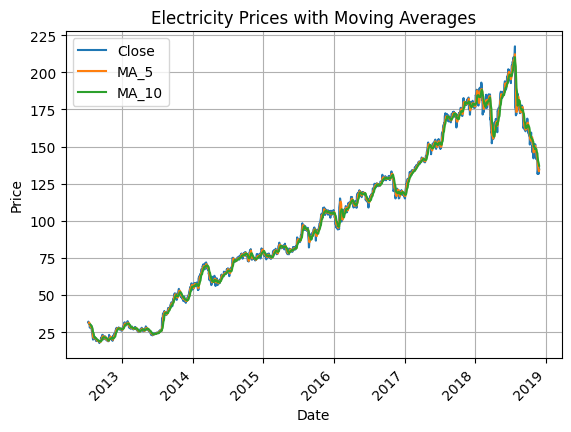

In [14]:

plt.figure(figsize=(12, 6))

data[["Close", "MA_" + str(window_sizes[0]), "MA_" + str(window_sizes[1])]].plot()
plt.title("Electricity Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [9]:
alpha = 0.2

data["EMA"] = data["Close"].ewm(alpha=alpha, min_periods=0, adjust=False).mean()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


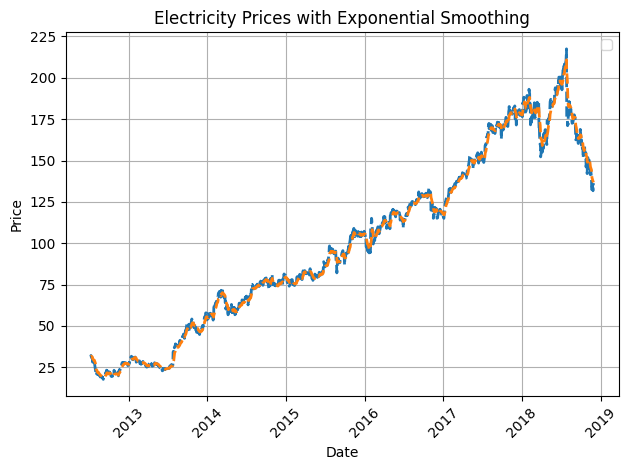

In [36]:
plt.plot(data[["Close", "EMA"]],markerfacecolor='red',linestyle='dashed',linewidth=2)
plt.title("Electricity Prices with Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid("True")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()